## Question 1

In [1]:
# ---------------------- Header ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter 
import re 

# Loading the initial Excel into a DataFrame
file = 'amazon_laptop_2023.xlsx'
xl = pd.ExcelFile(file) # Reads the excel file
df = pd.read_excel(xl,sheet_name='amazon laptop 2023') # Turns the excel into a DataFrame

#### Column Name Cleaning

In [2]:
df.columns = [col.upper() for col in df.columns] # Capitalizing the Column names
print(df.columns) # Checking if the function worked appropriately

Index(['BRAND', 'MODEL', 'SCREEN_SIZE', 'COLOR', 'HARDDISK', 'CPU', 'RAM',
       'OS', 'SPECIAL_FEATURES', 'GRAPHICS', 'GRAPHICS_COPROCESSOR',
       'CPU_SPEED', 'RATING', 'PRICE'],
      dtype='object')


### General Column Cleaning
- Making all Strings Uppercase
- No spaces at the beginning nor at the end

In [3]:
# Drop duplicates
print('Rows before: ',df.shape) # How many rows before deleting duplicates
df = df.drop_duplicates()
print('Rows after: ',df.shape) # How many rows after deleting duplicates

print(df.head()) # Checking what the first few look like for cleaning

# String cleaning function 
# Input: Each value from columns that are going to stay strings
def string_cleaning(x):
    if pd.isna(x):
        return np.nan
    else:
        return str(x).strip().upper() # Returns a string that is capitalized and has no spaces at the beginning nor end

# Columns that are strings and are going to stay strings after cleaning
columns_for_string_cleaning = ['BRAND', 'MODEL','COLOR','CPU','OS','SPECIAL_FEATURES','GRAPHICS', 'GRAPHICS_COPROCESSOR']

# Cleans all elements in the column
for column in columns_for_string_cleaning:
    df[column] = df[column].apply(string_cleaning) # Apply the function

df.replace("", np.nan, inplace=True) # All empty strings are np.nan

print(df.head()) # Checking if the cleaning has worked appropriately


Rows before:  (4446, 14)
Rows after:  (2628, 14)
  BRAND                     MODEL  SCREEN_SIZE                        COLOR  \
0    HP             EliteBook 840    14 Inches                       Silver   
1  Dell          Inspiron 15 3530  15.6 Inches                        Black   
2  Dell        Vostro 3510 Laptop  15.6 Inches                        Black   
3  Dell      Inspiron 7420 2-in-1    14 Inches  Grey, Gray, Platinum Silver   
4   MSI  Prestige 14Evo A11MO-217    14 Inches                         Gary   

  HARDDISK             CPU    RAM               OS       SPECIAL_FEATURES  \
0   256 GB   Core i5 6200U  16 GB   Windows 10 Pro     Anti Glare Coating   
1     2 TB  Core i7 Family  64 GB  Windows 11 Home                    NaN   
2  1000 GB         Core i7  32 GB  Windows 10 Home       Wifi & Bluetooth   
3  2000 GB         Core i5  64 GB   Windows 11 Pro                    NaN   
4      NaN         Core i7  32 GB       Windows 10  Anti-glare,Thin Bezel   

     GRAPHICS

#### Column: 'BRAND'
- Manual adjustments
- Function to update/change Brand Names based on Laptop Model
- Change names of laptops that occur 3 or less times (Outliers)

In [4]:
print(df['BRAND'].unique(),df['BRAND'].nunique()) # Understand what the column looks like

# Manual adjustments
print(df[df['BRAND'] == 'MAC']) # Matches the criteria for an APPLE MAC
df['BRAND'].loc[df['BRAND'] =='MAC'] = 'APPLE'

print(df[df['BRAND'] == 'LATITUDE']) # Matches the criteria for an DELL
df['BRAND'].loc[df['BRAND'] =='LATITUDE'] = 'DELL'


# Many Laptop Modles have the Brand Name in its value.
# For loops to update/check that both of these columns are in line with each other
for index, row in df.iterrows():
    model_parts = str(row['MODEL']).split() # Split the model into parts seperated by spaces
    for part in model_parts:
        if part in df['BRAND'].unique() and row['BRAND'] != part:
            # If conditions are met, this means the brand name was a part of the model name but wasn't in the brand column of the same row
            df.at[index, 'BRAND'] = part # Change the brand name to the one identified from the Laptop Model
            break  # No neet to continue with the same row


# Outliers - Change any rows that have very infrequent brands
min_freq = 3 # If they are 3 or less brands in the excel sheets, then it will be converted to '_OTHER_'
value_counts = df['BRAND'].value_counts()
keep_levels = list(value_counts[value_counts.values>min_freq].index)
df['BRAND'] = df['BRAND'].where(df['BRAND'].isin(keep_levels), '_OTHER_')


print(df['BRAND'].value_counts(),df['BRAND'].nunique()) # Checking if cleaning was appropriately done

['HP' 'DELL' 'MSI' 'LENOVO' 'ACER' 'ASUS' 'LG' 'APPLE' 'MICROSOFT'
 'SAMSUNG' 'GIGABYTE' 'TOUGHBOOK' 'ALIENWARE' 'XAMMUE' 'SHOXLAB' 'RAZER'
 'CORSAIR' 'XPG' 'PANASONIC' 'LPT' 'VAIO' 'LATITUDE'
 'CARLISLE FOODSERVICE PRODUCTS' 'GATEWAY' 'QUALITY REFURBISHED COMPUTERS'
 'TOPOSH' 'IVIEW' 'MAINGEAR' 'COMPUTER UPGRADE KING' 'ELO' 'GIZPRO' 'JTD'
 'MYTRIX' 'ONN' 'GOLDENGULF' 'LUQEEG' 'TOCOSY' 'ROKC' 'AWOW'
 'BEST NOTEBOOKS' 'CTL' 'MAC' 'MICROTELLA' 'ENOVO'] 44
     BRAND                MODEL  SCREEN_SIZE       COLOR HARDDISK      CPU  \
3475   MAC  MACBOOK PRO 13-INCH  13.3 Inches  SPACE GRAY   128 GB  CORE I5   

       RAM      OS SPECIAL_FEATURES    GRAPHICS GRAPHICS_COPROCESSOR  \
3475  8 GB  MAC OS              NaN  INTEGRATED  INTEGRATED_GRAPHICS   

     CPU_SPEED  RATING     PRICE  
3475       NaN     4.5  $689.95   
         BRAND           MODEL  SCREEN_SIZE   COLOR HARDDISK            CPU  \
1430  LATITUDE  LATITUDE E6410    14 Inches  SILVER   128 GB   CORE I3-520M   
1438  LATITU

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/931394516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BRAND'].loc[df['BRAND'] =='MAC'] = 'APPLE'
/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/931394516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BRAND'].loc[df['BRAND'] =='LATITUDE'] = 'DELL'


BRAND
DELL         1398
LENOVO        312
HP            256
ASUS          163
ALIENWARE     119
ACER          115
MSI            85
LG             37
APPLE          29
_OTHER_        28
SAMSUNG        23
MICROSOFT      15
TOUGHBOOK      15
GIGABYTE       11
PANASONIC       8
ROKC            8
RAZER           6
Name: count, dtype: int64 17


#### Column: 'MODEL'
- Remove all rows that do not include Laptop Model

In [5]:
print('Rows before: ',df.shape) # How many rows before deleting
df = df.dropna(subset=['MODEL']) # If there is no Model value, then we cannot identify the laptop, hence can be deleted
print('Rows after: ',df.shape) # How many rows after deleting
print(df['MODEL'].value_counts())
print(df['MODEL'].nunique())

Rows before:  (2628, 14)
Rows after:  (2497, 14)
MODEL
INSPIRON 3511 LAPTOP     87
LATITUDE 5520 LAPTOP     85
LATITUDE 3520 LAPTOP     60
LATITUDE                 42
DELL LATITUDE            36
                         ..
ASUS ROG ZEPHYRUS         1
T420                      1
ASUS                      1
ACER 315                  1
HP PRODESK 400 G3-SFF     1
Name: count, Length: 1058, dtype: int64
1058


#### Column: 'SCREEN_SIZE'
- Remove 'INCHES'
- Convert Strings to numerical
- Remove Outliers (Removal of numbers below 1 Percentile and above 99 Percentile)

In [6]:
print(df['SCREEN_SIZE'].unique(),df['SCREEN_SIZE'].nunique()) # Understand what the column looks like

# Function for cleaning SCREEN_SIZE
# Input: Each value from the column SCREEN_SIZE
def screen_size_cleaning(screen_size):
    # if value is NaN, then return np.nan
    if pd.isna(screen_size):
        return np.nan
    else:
        # Filter and only keep characters that are digits or '.'
        out = []
        for char in screen_size:
            if char.isdigit() or char == '.':
                out.append(char)
        screen_size = float(''.join(out)) # Join the array and turn it into a float
    return screen_size # return the float value

df['SCREEN_SIZE'] = df['SCREEN_SIZE'].apply(screen_size_cleaning) # Apply the function

# Outliers
lower, upper = df['SCREEN_SIZE'].quantile([0.01, 0.99]) # Find the 1st percentile and 99th percentile
print(lower, upper)
df = df[(df['SCREEN_SIZE'] >= lower) | pd.isna(df['SCREEN_SIZE'])] # Keep rows that are above or equal to 1st percentile or np.nan
df = df[(df['SCREEN_SIZE'] <= upper) | pd.isna(df['SCREEN_SIZE'])] # Keep rows that are below or equal to 99th percentile or np.nan

print(df['SCREEN_SIZE'].value_counts()) # Checking if the cleaning worked appropriately
df.rename(columns={'SCREEN_SIZE': 'SCREEN_SIZE(INCHES)'}, inplace=True) # Changed the column name to generalize


['14 Inches' '15.6 Inches' '13.5 Inches' '16 Inches' '11.6 Inches'
 '15 Inches' '13 Inches' '13.4 Inches' '13.3 Inches' '17.3 Inches' nan
 '17 Inches' '15.3 Inches' '13.6 Inches' '13.9 Inches' '16.1 Inches'
 '13.1 Inches' '15.66 Inches' '15.4 Inches' '12 Inches' '16.2 Inches'
 '10.1 Inches' '27 Inches' '14.1 Inches' '18 Inches' '14.5 Inches'
 '22 Inches' '12.5 Inches' '12.45 Inches' '14.4 Inches' '10.5 Inches'
 '11 Inches' '12.2 Inches' '10 Inches' '12.3 Inches' '12.4 Inches'] 35
11.6 18.0
SCREEN_SIZE
15.60    977
14.00    605
16.00    209
13.30    176
17.30    142
17.00     82
11.60     73
13.40     43
18.00     39
13.00     35
15.00     24
13.50     11
12.50      9
12.00      7
14.10      7
13.10      6
16.10      5
14.50      4
15.40      3
13.60      3
12.30      3
13.90      2
12.45      2
12.40      2
15.66      1
16.20      1
15.30      1
14.40      1
12.20      1
Name: count, dtype: int64


#### Column: 'COLOR'
- Manual adjustments of 'GARY' and 'GRAY' to 'GREY'
- Generalization of all colors e.g. 'SHALE BLACK' --> 'BLACK'


In [7]:
print(df['COLOR'].unique()) # Understand what the column looks like

# Function that generalizes colors
# Input: Each value from the column COLOR
# Output: An array of the colors offered
def color_cleaning(color):
    if pd.isna(color):
        return np.nan # return np.nan if input is empty

    # Genralize the spelling of 'Grey'
    color = re.sub(r'\b(?:GRAY|GARY)\b', 'GREY', color)

    # General Color in the variable primary_colors
    primary_colors = ['SILVER', 'BLACK', 'GREY', 'WHITE', 'BLUE', 'RED', 'GREEN', 'GOLD', 'PINK']
    out = []

    # Splitting by ',' or '/'
    color_parts = re.split(r'[,/]', color)

    # for loops create an array of the colors offered and the colors are also generalized in this for loop
    for col in color_parts:
        col = col.strip()
        matched = False
        # for loop checks if the current color is in the primary_colors
        for primary in primary_colors:
            if primary in col:
                out.append(primary)
                matched = True
                break  # Break after finding the primary color
        # If not then the color is just added to the array
        if not matched:
            out.append(col)

    return list(set(out))

df['COLOR'] = df['COLOR'].apply(color_cleaning) # Apply the function
print(df['COLOR'].value_counts()) # Checking if the cleaning worked appropriately

['SILVER' 'BLACK' 'GREY, GRAY, PLATINUM SILVER' 'GARY' 'GRAY' nan
 'GRAY, PLATINUM SILVER' 'CARBON GRAY' 'TITAN GRAY' 'PURE SILVER'
 'PLATINUM SILVER' 'ECLIPSE GRAY' 'DARK MOSS' 'NATURAL SILVER'
 'GRAPHITE BLACK' 'GRAPHITE' 'OBSIDIAN BLACK' 'ALUMINUM' 'ARCTIC GREY'
 'PLATINUM' 'BLUE' 'GREY' 'GREEN' 'SLATE GREY' 'SILVER/CARBON FIBER' 'SKY'
 'SHADOW GREY' 'BURGUNDY RED' 'MIDNIGHT' 'MECHA GRAY' 'OFF BLACK' 'GOLD'
 'MINERAL GREY' 'MIST BLUE' 'PUNK PINK' 'SHALE BLACK' 'STAR BLACK'
 'CARBON FIBER' 'GRAY, SILVER' 'SHADOW BLACK' 'WHITE' 'FOG BLUE'
 'RGB BACKLIT' 'CLOUD GREY' 'PHANTOM GREY' 'DARK SIDE OF THE MOON'
 'BASALT GREY' 'MATTE BLACK' 'MYSTIC BLUE' 'INDIE BLACK' 'STORMY GREY'
 'MYSTIC BLACK' 'PHANTOM GREY WITH SPECKLES' 'INK BLACK' 'GALAXY BLACK'
 'EVO I7-1260P' 'TITAN GRAY DULL' 'ALUMINUM TITAN GRAY' 'DARK SHADOW GREY'
 'ROYAL BLUE' 'JADE BLACK' 'QUIET BLUE' 'MICA SILVER' 'PHANTOM BLUE'
 'DARK SIDE OF THE MOON WITH HIGH ENDURANCE CLEAR COAT AND SILKY SMOOTH FINISH'
 'LUNAR WHITE' 'BLAC

#### Column: 'HARDDISK'
- Turn strings to floats
- Outliers (Remove any values below 1st Percentile)
- Put the values into bins of numbers between powers of 2

In [8]:
print(df['HARDDISK'].unique(),df['HARDDISK'].nunique()) # Understand what the column looks like

# Funciton to turn strings to float
# Input: Each value from the 'HARDDISK' column
def harddisk_cleaning(harddisk):
    # If harddisk value is NaN or does not have a measurement(E.g. GB, TB, ...) then return NaN
    if pd.isna(harddisk) or isinstance(harddisk, int):
        return np.nan 
    
    # If value has GB, then just remove GB
    if isinstance(harddisk, str) and 'GB' in harddisk:
        out =  round(float(harddisk.replace('GB', '')),2) # Turn to float and round to 2 decimal places
    # If value has TB, then remove TB and multiply by 1024
    elif isinstance(harddisk, str) and 'TB' in harddisk:
        out = round(float(harddisk.replace('TB', '')) * 1024,2) # Turn to float and round to 2 decimal places
    # If value has MB, then remove MB and divide by 1024
    elif isinstance(harddisk, str) and 'MB' in harddisk:
        out = round(float(harddisk.replace('MB', '')) / 1024,2) # Turn to float and round to 2 decimal places
    else:
        return np.nan # Return NaN for everything else
    return out

df['HARDDISK'] = df['HARDDISK'].apply(harddisk_cleaning) # Apply the funciton

# Outliers
lower = df['HARDDISK'].quantile(0.01) # Calculate the 1st percentile
print(lower)
df = df[(df['HARDDISK'] >= lower) | pd.isna(df['HARDDISK'])] # Keep if above 1st Percentile or NaN value

df['HARDDISK'] = pd.cut(df.HARDDISK, bins=[2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]) # Put each of the values into bins (Categories)

print(df['HARDDISK'].value_counts()) # Checking if cleaning was appropriate
df.rename(columns={'HARDDISK': 'HARDDISK(GB)'}, inplace=True) # Generalizing


['256 GB' '2 TB' '1000 GB' '2000 GB' nan '512 GB' '128 GB' '4000 GB'
 '1 TB' '2048 GB' '16 GB' '1024 GB' '4 TB' '6000 GB' '3 TB' 512 '8000 GB'
 '1256 GB' '320 GB' '32 GB' '64 GB' '160 GB' '120 GB' '500 GB' '8 TB'
 '64 MB' 64 '32 MB' '250 GB' '1.5 TB' '1512 GB' '128 MB' '240 GB' '480 GB'
 '512 MB' '8 GB' '300 GB'] 36
32.0
HARDDISK
(256, 512]      729
(512, 1024]     602
(128, 256]      449
(1024, 2048]    264
(64, 128]       102
(2048, 4096]     69
(32, 64]         49
(16, 32]         43
(4096, 8192]     21
(2, 4]            0
(4, 8]            0
(8, 16]           0
Name: count, dtype: int64


#### Column: 'CPU'
- Generalize the input to the most common CPUs

In [9]:
print(df['CPU'].unique()) # Understand what the column looks like
# Since I can see that there are 3 main types of CPUs, these are Intel, Apple and AMD, I will use these distinctions mainly
# Input: Each value from the column CPU
def cpu_cleaning(cpu):
    if pd.isna(cpu) or cpu == 'UNKNOWN' or cpu == 'OTHERS':
        return np.nan # Return NaN if NaN/'UNKNOWN'/'OTHERS'
    
    if 'CORE' in cpu:
        if 'I9' in cpu:
            return 'INTEL CORE I9'
        elif 'I7' in cpu:
            return 'INTEL CORE I7'
        elif 'I5' in cpu:
            return 'INTEL CORE I5'
        elif 'I3' in cpu:
            return 'INTEL CORE I3'
        elif ' M ' in cpu:
            return 'INTEL CORE M'
        else:
            return 'INTEL CORE - UNKNOWN'
    elif 'CELERON' in cpu:
        return 'INTEL CELERON'   
    elif 'PENTIUM' in cpu:
        return 'INTEL PENTIUM'
    elif 'ATOM' in cpu:
        return 'INTEL ATOM'
    elif 'XEON' in cpu:
            return 'INTEL XEON'
    elif 'INTEL' in cpu:
        return 'INTEL - UNKNOWN'
    elif 'APPLE' in cpu:
        if 'M1' in cpu:
            return 'APPLE M1'
        elif 'M2' in cpu:
            return 'APPLE M2'
        else:
            return 'APPLE - UNKNOWN'
    elif 'RYZEN' in cpu:
        if '9' in cpu:
            return 'AMD RYZEN 9'
        elif '7' in cpu:
            return 'AMD RYZEN 7'
        elif '5' in cpu:
            return 'AMD RYZEN 5'
        elif '3' in cpu:
            return 'AMD RYZEN 3'
        else:
            return 'AMD RYZEN - UNKNOWN'
    elif 'ATHLON' in cpu:
        return 'AMD ATHLON'
    elif 'A-SERIES' in cpu:
        return 'AMD A-SERIES'
    else:
        return cpu
    

df['CPU'] = df['CPU'].apply(cpu_cleaning) # Apply the function

print(df['CPU'].value_counts()) # Verify the changes


['CORE I5 6200U' 'CORE I7 FAMILY' 'CORE I7' 'CORE I5' 'AMD RYZEN 7'
 'RYZEN 5' 'UNKNOWN' 'AMD R SERIES' 'CORE I5 FAMILY' 'INTEL CORE I5'
 'INTEL CORE I5 1145G7' 'INTEL CORE I7' 'INTEL CORE I5-1135G7' nan
 'RYZEN 5 4600H' 'RYZEN 7' 'CORE I7-10700T' 'CORE I7 12700H' 'CORE I3'
 'RYZEN 7 5800H' 'INTEL MOBILE CPU' '68000' 'APPLE M1'
 '1.2GHZ CORTEX A8 PROCESSOR' 'AMD RYZEN 5 5500U' 'COREI7-10750H'
 'INTEL CORE I7-1165G7' 'INTEL CORE I7 1185G7' '8032' 'CORE I7 7500U'
 'CORE I5-1035G1' 'AMD RYZEN 7 5800H' 'RYZEN 7 2700U' 'RYZEN 9' 'CORE I9'
 'CORE I9 7960X' 'SNAPDRAGON' 'INTEL CORE I7 EXTREME' 'CORE I7-8650U'
 'CORE I5 7200U' 'INTEL CORE I9' 'CORE I7 11800H' 'INTEL CORE DUO'
 'CORE I7 8750H' 'INTEL CORE I7 12800H' 'CORE I7 8550U' 'AMD A SERIES'
 'AMD RYZEN 9 5900X' 'CORE I7-1065G7' 'INTEL CORE M-5Y10 PROCESSOR'
 'A-SERIES DUAL-CORE A4-3300M' 'ARM 7100' 'RYZEN 7 4800H' 'COREI7-10875H'
 'CORE I5-3320M' 'CORE I3-520M' 'MEDIATEK MT8183' 'CELERON'
 'CELERON N4000' 'CORE I5 5300U' 'CELERON N' 'CORE

#### Column: 'RAM'
- Turns string to float
- Outliers (Remove any values below 1st Percentile)


In [10]:
print(df['RAM'].unique(),df['RAM'].nunique()) # Understand what the column looks like

# Function turns strings to floats
# Input: Each value from the column RAM
def ram_cleaning(ram):
    # If ram value is NaN or does not have a measurement(E.g. GB, TB, ...) then return NaN
    if pd.isna(ram) or isinstance(ram, int):
        return np.nan 
    
    # If value has GB, then just remove GB
    if isinstance(ram, str) and 'GB' in ram:
        out = round(float(ram.replace('GB', '')),2) # Turn to float and round to 2 decimal places
    # If value has MB, then remove MB and divide by 1024
    elif isinstance(ram, str) and 'MB' in ram:
        out = round(float(ram.replace('MB', '')) / 1024,2) # Turn to float and round to 2 decimal places
    else:
        return np.nan # Return NaN for everything else
    
    return out

df['RAM'] = df['RAM'].apply(ram_cleaning) # Apply the function

# Outliers
lower = df['RAM'].quantile(0.01)
print(lower)
df = df[(df['RAM'] >= lower) | pd.isna(df['RAM'])] # Keep if above 1st Percentile or NaN value

df.rename(columns={'RAM': 'RAM(GB)'}, inplace=True) # Generalizing
print(df['RAM(GB)'].value_counts()) # Verification

['16 GB' '64 GB' '32 GB' '8 GB' nan '12 GB' '4 GB' '24 GB' '40 GB' '5 GB'
 '1 GB' '48 GB' '2 GB' '31.99 GB' '6 GB' '20 GB' '128 GB' '64 MB'] 17
4.0
RAM(GB)
16.00     951
32.00     521
8.00      433
64.00     234
4.00      184
12.00      33
24.00      19
40.00      12
48.00      12
20.00       6
6.00        3
128.00      3
5.00        1
31.99       1
Name: count, dtype: int64


#### Column: 'OS'
- Generalization of OS

In [11]:
print(df['OS'].unique(),df['OS'].nunique()) # Understand what the column looks like

# Function generalizes the values
# Input: Each value from the column OS
def os_cleaning(os):
    if pd.isna(os):
        return os # If OS value is NaN 
    
    # Generalizing the Windows OS so that its more manageable
    if 'WIN' in os:
        if '11' in os:
            return 'WINDOWS 11'
        elif '10' in os:
            return 'WINDOWS 10'
        elif '9' in os:
            return 'WINDOWS 9'
        elif '8' in os:
            return 'WINDOWS 8'
        elif '7' in os:
            return 'WINDOWS 7'
        else:
            return 'WINDOWS - UNKNOWN'
    
    # Generalizingthe Mac OS so that its more manageable
    elif 'MAC' in os:
        return 'MAC OS'

    # Clean the inputs that are nonsensical
    elif os in ['NO', 'UNKNOWN', 'PC']:
        return np.nan
    return os

df['OS'] = df['OS'].apply(os_cleaning) # Apply the function


print(df['OS'].unique(),df['OS'].nunique()) # Verification
print(df['OS'].value_counts()) # Verification


['WINDOWS 10 PRO' 'WINDOWS 11 HOME' 'WINDOWS 10 HOME' 'WINDOWS 11 PRO'
 'WINDOWS 10' 'WINDOWS 11' 'MAC OS' 'WINDOWS 7' nan 'CHROME OS'
 'WINDOWS PRO' 'MACOS 10.12 SIERRA' 'MACOS 12 MONTEREY'
 'WINDOWS 10 HOME 64' 'WINDOWS 10 PRO (ENGLISH/FRENCH/SPANISH)'
 'WINDOWS 10 PRO (64-BIT)' 'WIN 10 PRO / FREE UPGRADE TO WIN 11'
 'MICROSOFT WINDOWS 10 PROFESSIONAL (64BIT)' 'NO' 'WINDOWS 7 PROFESSIONAL'
 'WINDOWS 10 S' 'WINDOWS 8' 'WINDOWS 11 S' 'WINDOWS'
 'WINDOWS 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH'
 'WINDOWS 10 PRO 64 BIT-MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH.'
 'WINDOWS 10 PRO 64-BIT' 'WINDOWS 11 HOME S'
 'WINDOWS 10 64 BIT-MULTI-LANGUAGE SUPPORTS ENGLISH/SPANISH/FRENCH'
 'WINDOWS 8.1'
 'WIN 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH(RENEWED)'
 'WIN 10 PRO 64 BIT MULTI-LANGUAGE SUPPORT ENGLISH/FRENCH/SPANISH'
 'WINDOWS 10 PRO 64 BIT-MULTI-LANGUAGE SUPPORTS ENGLISH/SPANISH/FRENCH'
 'WINDOWS 11 HOME IN S MODE' 'WINDOWS 10 PROFESSIONAL 64-BIT' 'HP 

#### Column: 'SPECIAL_FEATURES'
- Turn strings into an array of different special features

In [12]:
print(df['SPECIAL_FEATURES'].unique(),df['SPECIAL_FEATURES'].nunique()) # Understand what the column looks like

# Function generalizes the values
# Input: Each value from the column SPECIAL_FEATURES
def features_cleaning(features):
    if pd.isna(features):
        return np.nan # If SPECIAL_FEATURES value is NaN return NaN
    
    # Split if there is ',' or ';'
    feature_parts = re.split(r'[,;]', features)
    out = []
    # Check if any of the parts meet the description
    for feature in feature_parts:
        if 'ANTI GLARE' in feature or 'ANTI-GLARE' in feature:
            out.append('ANTI GLARE')
        elif 'BACKLIT' in feature or 'BACKLIGHT' in feature:
            out.append('BACKLIT KEYBOARD')
        elif 'FINGERPRINT' in feature:
            out.append('FINGERPRINT READER')
        elif 'HD AUDIO' in feature or 'HIGH DEFINITION AUDIO' in feature:
            out.append('HD AUDIO')
        elif 'MEMORY CARD' in feature:
            out.append('MEMORY CARD SLOT')
        elif 'BEZEL' in feature:
            out.append('THIN BEZEL')
        elif 'STYLUS' in feature or 'PEN' in feature:
            out.append('SUPPORT STYLUS')
        elif 'WATER' in feature or 'SPILL' in feature:
            out.append('WATER-RESISTANT')
        elif 'ALEXA' in feature:
            out.append('ALEXA')
        elif 'SPEAKERS' in feature:
            out.append('STEREO SPEAKERS')
        else:
            out.append(feature) # If not then the value can just be added to the array


    return list(set(out)) # Return array


df['SPECIAL_FEATURES'] = df['SPECIAL_FEATURES'].apply(features_cleaning) # Apply function
print(df['SPECIAL_FEATURES'].value_counts()) # Verification

['ANTI GLARE COATING' nan 'WIFI & BLUETOOTH' 'ANTI-GLARE,THIN BEZEL'
 'ANTI-GLARE SCREEN' 'BACKLIT KEYBOARD' 'ANTI-GLARE' 'FINGERPRINT READER'
 'HD AUDIO, BACKLIT KEYBOARD, ANTI GLARE COATING' 'ANTI GLARE'
 'INFORMATION NOT AVAILABLE'
 'HD AUDIO, BACKLIT KEYBOARD, ANTI GLARE COATING, NUMERIC KEYPAD'
 'FINGERPRINT READER, HD AUDIO, BACKLIT KEYBOARD, NUMERIC KEYPAD'
 'FINGERPRINT READER, BACKLIT KEYBOARD, MEMORY CARD SLOT'
 'FINGERPRINT READER, HD AUDIO, BACKLIT KEYBOARD, MEMORY CARD SLOT'
 'FINGERPRINT' 'FINGERPRINT READER, HD AUDIO, BACKLIT KEYBOARD' 'STYLUS'
 'FINGERPRINT READER, HD AUDIO, BACKLIT KEYBOARD, ANTI GLARE COATING, MEMORY CARD SLOT'
 'BACKLIT KEYBOARD, SUPPORT STYLUS' 'SECURITY SLOT'
 'ANTI-GLARE,BACKLIT KEYBOARD' 'BACKLIT KB,BEZEL,FINGERPRINT'
 'FULL HD ANTI-GLARE'
 'HD AUDIO, FINGERPRINT READER, BACKLIT KEYBOARD, SUPPORT STYLUS'
 'THIN BEZEL'
 'FINGERPRINT READER, HD AUDIO, BACKLIT KEYBOARD, SUPPORT STYLUS, MEMORY CARD SLOT'
 'SPILL-RESISTANT'
 'FINGERPRINT READER, HIGH 

#### Column: 'GRAPHICS'
- Turn most values to 'DEDICATED' or 'INTEGRATED'

In [13]:
print(df['GRAPHICS'].value_counts()) # Understand what the column looks like
# Function turns the values to 'DEDICATED' or 'INTEGRATED'
# Input: Each value from the column 'GRAPHICS'
def graphics_cleaning(gpu):
    if pd.isna(gpu) or gpu in ['UNKNOWN', 'OTHERS']:
        return np.nan # If ram value is NaN or nonsensical
    
    # Categorize NVIDIA GPUs
    if 'NVIDIA' in gpu or 'GEFORCE' in gpu or 'QUADRO' in gpu or 'RTX' in gpu:
        return 'DEDICATED' # return them as 'DEDICATED'

    # Categorize AMD GPUs
    elif 'RADEON' in gpu or 'AMD' in gpu:
        return 'DEDICATED' # return them as 'DEDICATED'

    # Categorize Intel GPUs
    elif 'INTEL' in gpu or 'IRIS' in gpu or 'UHD' in gpu or 'HD GRAPHICS' in gpu:
        return 'INTEGRATED' # return them as 'INTEGRATED'

    # Categorize as Integrated or Dedicated
    elif 'INTEGRATED' in gpu:
        return 'INTEGRATED'
    elif 'DEDICATED' in gpu:
        return 'DEDICATED'

    return gpu # If doesn't come under those conditions, just return the value

df['GRAPHICS'] = df['GRAPHICS'].apply(graphics_cleaning) # Apply the function

print(df['GRAPHICS'].value_counts()) # Verification

GRAPHICS
INTEGRATED                            1511
DEDICATED                              427
IRIS XE GRAPHICS                        85
NVIDIA GEFORCE RTX 4070                 27
UHD GRAPHICS                            24
                                      ... 
RTX 3070TI                               1
GEFORCE GTX 1650 TI                      1
NVIDIA GEFORCE RTX 4070, DEDICATED       1
RTX 4080                                 1
NVIDIA GEFORCE GTX 1650 4GB              1
Name: count, Length: 107, dtype: int64
GRAPHICS
INTEGRATED      1666
DEDICATED        735
T550               7
T1200              2
QN20-M1-R          2
GT2 GRAPHICS       1
SHARED             1
ADRENO 618         1
Name: count, dtype: int64


#### Column: 'CPU_SPEED'
- Turns strings to float
- Replacing missing entries with the average CPU speed as other rows with the same CPU
- Remove Outliers (Removal of numbers below 1 Percentile and above 99 Percentile)

In [14]:
print(df['CPU_SPEED'].unique()) # Understand what the column looks like

# Function turns the strings to float
# Input: Each value from the column 'CPU_SPEED'
def cpu_speed_cleaning(cpu_speed):
    if pd.isna(cpu_speed) or isinstance(cpu_speed, float):
        return np.nan # If ram value is NaN or does not have a measurement(E.g. GHz) then return NaN
        
    if 'GHz' in cpu_speed:
        cpu_speed = cpu_speed.replace('GHz','') # If there are multible values, then just choose the best CPU speed because all are the same price
        if ',' in cpu_speed:
            multiple_speeds = cpu_speed.split(',')
            out = 0
            for i in multiple_speeds:
                if float(i) > out:
                    out = float(i)
            return round(out,2) # Return float that is rounded to 2 decimal points
        else:
            return round(float(cpu_speed),2) # Return float that is rounded to 2 decimal points
    elif 'MHz' in cpu_speed:
        return round(float(cpu_speed.replace('MHz','')) / 1000,2) # Return float that is rounded to 2 decimal points
    elif 'Hz' in cpu_speed:
        return round(float(cpu_speed.replace('Hz','')) / 1000000000,2) # Return float that is rounded to 2 decimal points
    else:
        return np.nan
    
df['CPU_SPEED'] = df['CPU_SPEED'].apply(cpu_speed_cleaning) # Apply the function

# Addition of values:
# Replacing missing entries with the average CPU speed as other rows with the same CPU
# Calculating the average cpu_speeds for each cpu
average_speeds = df.groupby('CPU')['CPU_SPEED'].mean()

# Function adds the mean value to missing value if possible
def fill_missing_speed(row):
    if pd.isna(row['CPU_SPEED']):
        return round(average_speeds.get(row['CPU'], np.nan),2)  # Use np.nan as default if cpu type not found
    else:
        return row['CPU_SPEED']

df['CPU_SPEED'] = df.apply(fill_missing_speed, axis=1) # Apply funciton

df.rename(columns={'CPU_SPEED': 'CPU_SPEED(GHz)'}, inplace=True) # Generalize

# Outliers
lower, upper = df['CPU_SPEED(GHz)'].quantile([0.01, 0.99]) # Find 1st Percentile and 99th Percentile
print(lower, upper)
df = df[(df['CPU_SPEED(GHz)'] >= lower) | pd.isna(df['CPU_SPEED(GHz)'])] # Keep if above 1st Percentile or NaN value
df = df[(df['CPU_SPEED(GHz)'] <= upper) | pd.isna(df['CPU_SPEED(GHz)'])] # Keep if below 99th Percentile or NaN value
print(df['CPU_SPEED(GHz)'].value_counts()) # Verification

[nan '3.6 GHz' '2.1 GHz' '4.4 GHz' '3 GHz' '1.7 GHz' '3.5 GHz' 1.9
 '3.7 GHz' '2133 MHz' '4.2 GHz' '2.6 GHz' '1.8 GHz' '3.4 GHz' '4.7 GHz'
 3.4 '1.9 GHz' '4.6 GHz' '2.2 GHz' '4.5 GHz' 4.7 '1.6 GHz' '3.2 GHz'
 '3200 Hz' '2.4 GHz' '2.5 GHz' 3.3 '5.2 GHz' '5 GHz' '3.49 GHz' '2.9 GHz'
 '2.8 GHz' '4.8 GHz' '0.9 GHz' '5.6 GHz' '2.3 GHz' '2 GHz' '5.1 GHz'
 '1.3 GHz' '2.7 GHz' '2.66 GHz' '1.1 GHz' '1 GHz' '1.2 GHz' '3.9 GHz'
 '3.8 GHz' '1.4 GHz' 2.6 '4 GHz' 2.4 '4.3 GHz' 1.8 '2.53 GHz' '1.5 GHz'
 '3.3 GHz']
1.1 4.7
CPU_SPEED(GHz)
3.02    970
2.29    629
3.78    161
2.70    110
1.84     79
2.06     76
2.40     42
3.57     41
1.80     41
2.60     24
1.70     16
1.10     15
2.80     10
2.30      9
2.20      7
4.50      7
3.00      7
3.50      7
2.96      6
1.60      6
3.40      6
4.70      5
1.90      5
4.60      5
2.10      5
2.00      5
2.50      5
2.90      4
3.60      3
1.30      3
3.27      3
3.70      3
4.20      3
4.40      2
3.20      2
1.20      2
3.90      2
4.30      2
3.49      1
2.13

#### Column: 'RATING'
- Replacing missing entries with the average of ratings as other rows with the same Laptop Model
- Outliers (Remove any values below 1st Percentile)

In [15]:
print(df['RATING'].value_counts()) # Understand what the column looks like

# Calculating the average rating for each Laptop Model
mean_ratings_by_model = df.groupby('MODEL')['RATING'].mean() 

# Function to fill NaN ratings
# Function adds the mean value to missing value if possible
def fill_rating(row):
    if pd.isna(row['RATING']):
        return round(mean_ratings_by_model.get(row['MODEL'], np.nan),2) # Use np.nan as default if cpu type not found
    return round(row['RATING'],2)

# Apply the function to fill NaN ratings
df['RATING'] = df.apply(fill_rating, axis=1)


# Outliers
lower = df['RATING'].quantile(0.01) # Find 1st Percentile
print(lower)
df = df[(df['RATING'] >= lower) | pd.isna(df['RATING'])] # Keep if above 1st Percentile or NaN value
print(df['RATING'].value_counts()) # Verification

RATING
5.0    172
4.0     80
4.3     74
4.1     67
4.2     66
4.5     66
4.4     66
3.7     33
3.8     33
3.5     32
3.9     29
1.0     29
3.6     25
3.4     23
4.6     22
4.7     21
4.8     16
3.0     14
3.3     13
2.0      8
3.1      7
4.9      7
2.5      5
2.9      5
2.8      5
2.6      4
2.3      3
3.2      3
2.7      2
2.2      1
2.1      1
1.7      1
Name: count, dtype: int64
1.0
RATING
5.00    310
4.50     91
4.00     90
4.30     78
4.10     70
4.20     69
4.40     68
1.00     65
3.50     40
4.60     36
3.60     34
3.70     33
3.90     33
3.80     33
3.40     30
4.70     25
3.00     23
3.92     21
4.80     18
3.87     16
3.30     13
4.43     12
3.85     11
4.71      9
3.67      8
3.10      8
2.00      8
1.65      8
3.84      8
4.16      8
4.90      7
2.50      6
4.47      6
3.58      5
2.60      5
4.45      5
2.90      5
2.80      5
3.41      4
3.93      4
2.30      3
3.20      3
2.20      3
4.23      2
2.70      2
4.35      1
4.75      1
1.70      1
2.10      1
3.88      1
4.27

#### Column: 'PRICE'
- Remove all rows that do not have a value
- Converted strings to float

In [16]:
# Remove all rows that that do not have a value for price
print('Rows before: ',df.shape)
df = df.dropna(subset=['PRICE'])
print('Rows after: ',df.shape)

# Convert all the prices to a float
df['PRICE'] = df['PRICE'].replace('[,$ ]','',regex=True).astype(float)

# Rename column name to include the measurement
df.rename(columns={'PRICE': 'PRICE($)'}, inplace=True)
print(df['PRICE($)'].nunique())

Rows before:  (2431, 14)
Rows after:  (2426, 14)
1749


#### Column: 'GRAPHICS_COPROCESSOR'
- Generalizing of Graphics Coprocessors

In [17]:
print(df['GRAPHICS_COPROCESSOR'].value_counts()) # Understand what the column looks like

# Function generalizes the values
# Input: Each value from the column GRAPHICS_COPROCESSOR
def coprocessor_cleaning(gpu):
    if pd.isna(gpu):
        return np.nan # If GRAPHICS_COPROCESSOR value is NaN return NaN

    # Categorize NVIDIA GPUs
    if 'NVIDIA' in gpu or 'GEFORCE' in gpu or 'QUADRO' in gpu or 'RTX' in gpu:
        if 'GEFORCE' in gpu or 'RTX' in gpu:
            return 'NVIDIA GEFORCE'
        elif 'QUADRO' in gpu:
            return 'NVIDIA QUADRO'
        else:
            return 'NVIDIA OTHER'

    # Categorize AMD GPUs
    elif 'RADEON' in gpu or 'AMD' in gpu:
        if 'RADEON' in gpu:
            return 'AMD RADEON'
        else:
            return 'AMD OTHER'

    # Categorize Intel GPUs
    elif 'INTEL' in gpu or 'IRIS' in gpu or 'UHD' in gpu or 'HD GRAPHICS' in gpu:
        if 'IRIS' in gpu:
            return 'INTEL IRIS'
        elif 'UHD' in gpu:
            return 'INTEL UHD'
        elif 'HD GRAPHICS' in gpu:
            return 'INTEL HD'
        else:
            return 'INTEL OTHER'

    # Categorize as Integrated if mentioned
    elif 'INTEGRATED' in gpu:
        return 'INTEGRATED'

    return gpu
df['GRAPHICS_COPROCESSOR'] = df['GRAPHICS_COPROCESSOR'].apply(coprocessor_cleaning) # Apply the function

print(df['GRAPHICS_COPROCESSOR'].value_counts()) # Verification


GRAPHICS_COPROCESSOR
INTEL IRIS XE GRAPHICS                        134
INTEL INTEGRATED GRAPHICS                      99
INTEL UHD GRAPHICS                             67
AMD RADEON GRAPHICS                            39
INTEL                                          29
                                             ... 
INTEL HD 5500                                   1
NVIDIA Â® GEFORCE RTXÂ„¢ 4050                   1
INTEL IRIS XE GRAPHICS ELIGIBLE INTEGRATED      1
ATI MOBILITY RADEON 7500                        1
NVIDIA GEFORCE GTX 965M                         1
Name: count, Length: 188, dtype: int64
GRAPHICS_COPROCESSOR
NVIDIA GEFORCE         275
INTEL IRIS             152
INTEL OTHER            138
INTEL UHD              116
AMD RADEON              83
INTEL HD                81
INTEGRATED              31
NVIDIA OTHER            12
NVIDIA QUADRO           11
AMD OTHER               10
XPS9300-7909SLV-PUS      2
EMBEDDED                 2
POWERVR GX6250           2
M1 PRO            

In [18]:
writer = pd.ExcelWriter('amazon_laptop_2023_cleaned.xlsx',engine='xlsxwriter') # creating an object called writer, the first argument is file name then the second is what library handles excel file writing
df.to_excel(writer,'Cleaned Sheet') # Converts a DataFrame to an excel sheet
writer.close() # Saves 

## Question 2

### Client 1: The Gamer

Step 1:
- Understand which graphics is better, dedicated or integrated

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/2495415793.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GRAPHICS', y='RAM(GB)', data=graphics_ram_avg, palette=palette)


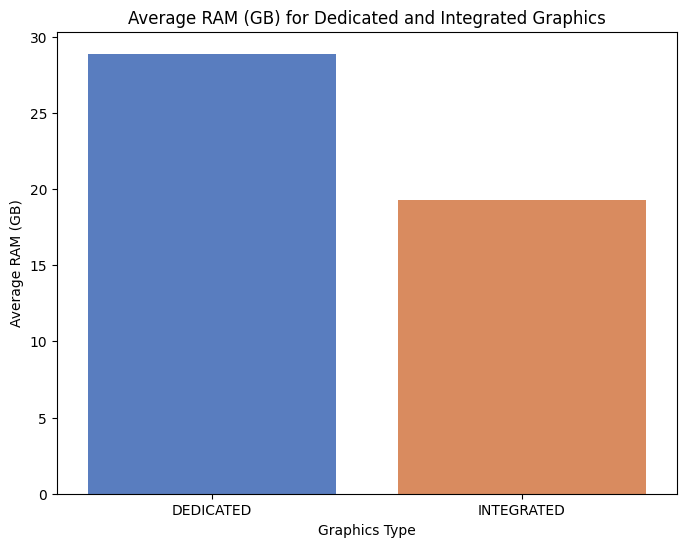

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/2495415793.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GRAPHICS', y='CPU_SPEED(GHz)', data=graphics_cpu_speed_avg, palette=palette)


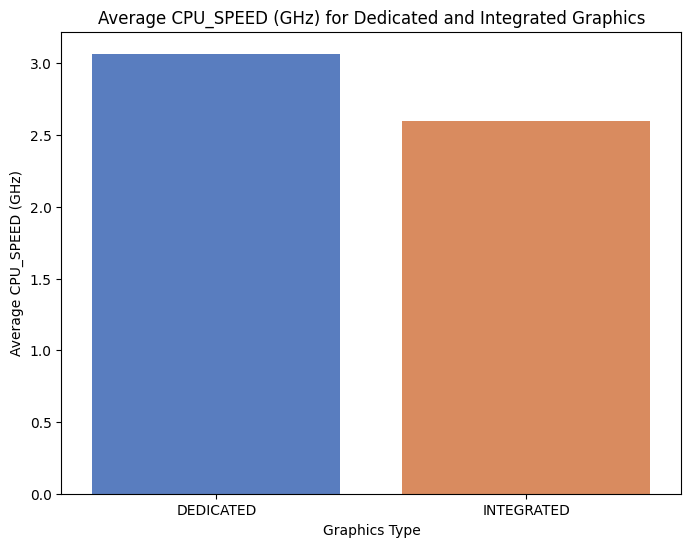

In [19]:
gamer_client_df = df # Creating a new dataframe so as to not alter the original one

# Filtering the dataset to include only 'DEDICATED' and 'INTEGRATED' graphics types
filtered_data = gamer_client_df[gamer_client_df['GRAPHICS'].isin(['DEDICATED', 'INTEGRATED'])]

palette = sns.color_palette("muted", 2) # Color to increase engagement of the graph

# Calculating the average of each graphics type
graphics_ram_avg = filtered_data.groupby('GRAPHICS')['RAM(GB)'].mean().reset_index()

# Plotting the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='GRAPHICS', y='RAM(GB)', data=graphics_ram_avg, palette=palette)
plt.title('Average RAM (GB) for Dedicated and Integrated Graphics')
plt.xlabel('Graphics Type')
plt.ylabel('Average RAM (GB)')
plt.show()


graphics_cpu_speed_avg = filtered_data.groupby('GRAPHICS')['CPU_SPEED(GHz)'].mean().reset_index()

# Plotting the barplo
plt.figure(figsize=(8, 6))
sns.barplot(x='GRAPHICS', y='CPU_SPEED(GHz)', data=graphics_cpu_speed_avg, palette=palette)
plt.title('Average CPU_SPEED (GHz) for Dedicated and Integrated Graphics')
plt.xlabel('Graphics Type')
plt.ylabel('Average CPU_SPEED (GHz)')
plt.show()


Step 2, 3 and Recommendations:
- Filter to meet essential requirements
- Create Gaming Score
- Top 5 Laptops

In [20]:
# No laptops above the price of 1500
gamer_client_df = df[df['PRICE($)'] <= 1500]

# No laptops below the storage of 512 GB
gamer_client_df['HARDDISK_MIN'] = gamer_client_df['HARDDISK(GB)'].astype(str).str.extract(r'(\d+)').astype(float) # Since the data type is categorical, this method allows to extract the bottom bound
gamer_client_df = gamer_client_df[gamer_client_df['HARDDISK_MIN'] >= 512] # Checks if the bottom bound is 512 or higher

# No laptops with no rating or rating below 4
gamer_client_df = gamer_client_df[gamer_client_df['RATING'] >= 4]

# Only laptops that have the dedicated graphics type
gamer_client_df = gamer_client_df[gamer_client_df['GRAPHICS'] != 'INTEGRATED']

# Computing the 'Gaming Score'
gamer_client_df['GAMING_SCORE'] = (0.6 * gamer_client_df['CPU_SPEED(GHz)']) + (0.4 * gamer_client_df['RAM(GB)'])

# Identifying the 5 laptops that have the highest score
top_5 = gamer_client_df.nlargest(5, 'GAMING_SCORE')

print(top_5)



/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/1479456481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamer_client_df['HARDDISK_MIN'] = gamer_client_df['HARDDISK(GB)'].astype(str).str.extract(r'(\d+)').astype(float) # Since the data type is categorical, this method allows to extract the bottom bound


     BRAND               MODEL  SCREEN_SIZE(INCHES)     COLOR  HARDDISK(GB)  \
113   ACER             NITRO 5                 15.6   [BLACK]  (1024, 2048]   
451   DELL       DELL G15 5520                 15.6    [GREY]   (512, 1024]   
332   ASUS       ROG STRIX G15                 15.6    [GREY]   (512, 1024]   
3567    HP         HP PAVILION                 15.6    [BLUE]   (512, 1024]   
46    DELL  DELL LATITUDE 5520                 15.6  [SILVER]  (1024, 2048]   

                CPU  RAM(GB)          OS  \
113   INTEL CORE I5     64.0  WINDOWS 11   
451   INTEL CORE I7     32.0  WINDOWS 11   
332     AMD RYZEN 7     32.0  WINDOWS 11   
3567    AMD RYZEN 7     32.0  WINDOWS 11   
46    INTEL CORE I5     32.0  WINDOWS 11   

                                       SPECIAL_FEATURES   GRAPHICS  \
113                                                 NaN  DEDICATED   
451                                                 NaN  DEDICATED   
332   [HD AUDIO,  NUMERIC KEYPAD, BACKLIT KEYBOARD

Review Step:
- Create graphs to verify that the laptop recommendations are valid

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/455223832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['GAMING_SCORE'] = (0.6 * new_df['CPU_SPEED(GHz)']) + (0.4 * new_df['RAM(GB)'])


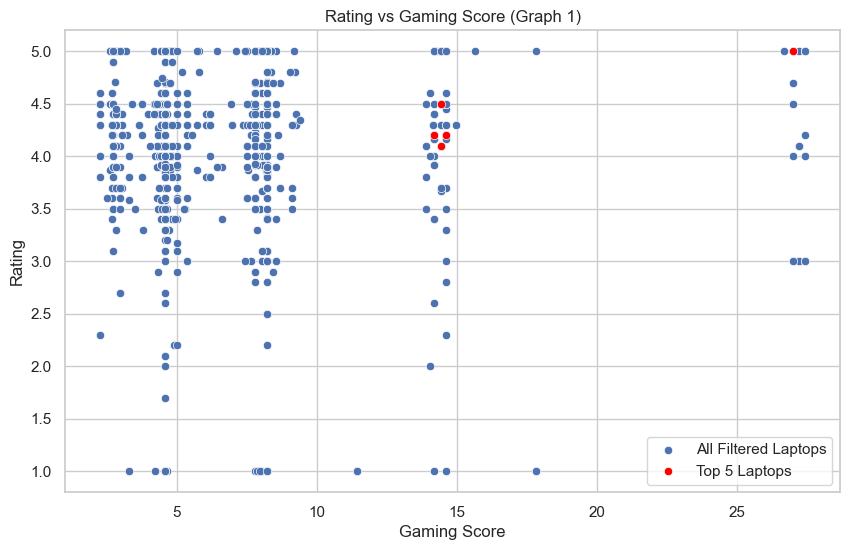

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/455223832.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_cpu_speed_per_brand.index, y=average_cpu_speed_per_brand.values, palette=palette)


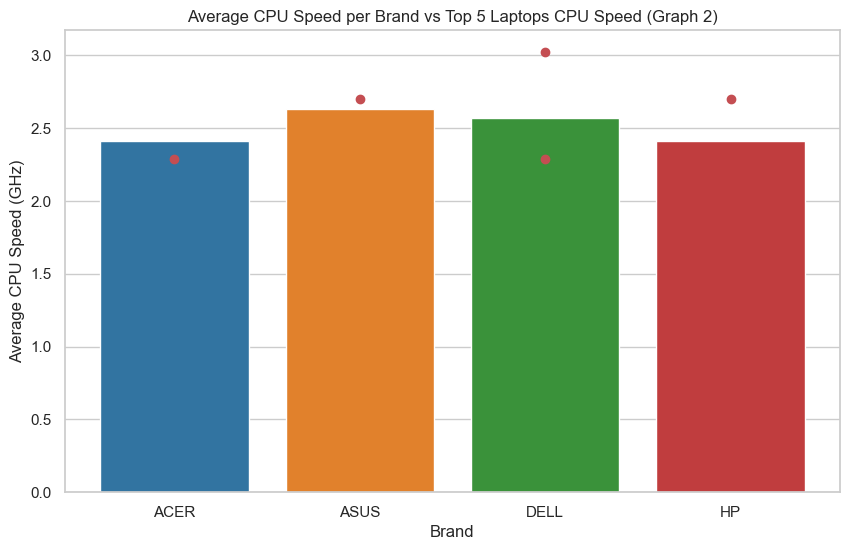

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/455223832.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_RAM_per_brand.index, y=average_RAM_per_brand.values, palette=palette)


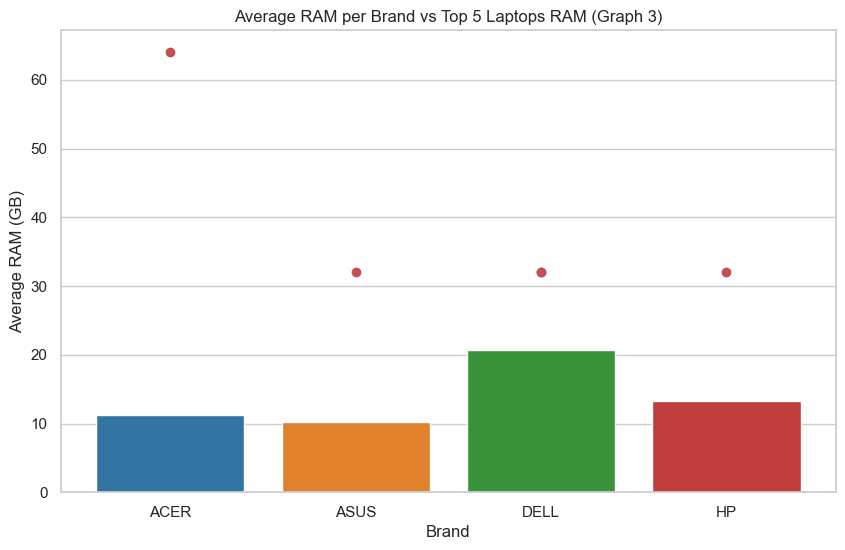

In [21]:
sns.set(style="whitegrid")

# Creating a new dataframe as so to not alter the original one
new_df = df[df['PRICE($)'] <= 1500]
new_df['GAMING_SCORE'] = (0.6 * new_df['CPU_SPEED(GHz)']) + (0.4 * new_df['RAM(GB)'])

# Graph 1: Rating vs Gaming Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GAMING_SCORE', y='RATING', data=new_df, label='All Filtered Laptops')
sns.scatterplot(x='GAMING_SCORE', y='RATING', data=top_5, color='red', label='Top 5 Laptops')
plt.title('Rating vs Gaming Score (Graph 1)')
plt.xlabel('Gaming Score')
plt.ylabel('Rating')
plt.legend()
plt.show()

# Preperation for Graph 2 and Graph 3
palette = sns.color_palette("tab10", 4)
# Calculating the average CPU speed for each brand in the top 5
average_cpu_speed_per_brand = new_df[new_df['BRAND'].isin(top_5['BRAND'])].groupby('BRAND')['CPU_SPEED(GHz)'].mean()
average_RAM_per_brand = new_df[new_df['BRAND'].isin(top_5['BRAND'])].groupby('BRAND')['RAM(GB)'].mean()
brands = top_5['BRAND']
cpu_speeds_top_5 = top_5['CPU_SPEED(GHz)']
RAM_speeds_top_5 = top_5['RAM(GB)']

# Graph 2
plt.figure(figsize=(10, 6))
sns.barplot(x=average_cpu_speed_per_brand.index, y=average_cpu_speed_per_brand.values, palette=palette)
plt.ylabel('Average CPU Speed (GHz)')
plt.xlabel('Brand')

# Plotting the CPU speeds of the top 5 laptops
for brand, cpu_speed in zip(brands, cpu_speeds_top_5):
    plt.plot(brand, cpu_speed, 'ro')  # 'ro' indicates red color and circle marker
plt.title('Average CPU Speed per Brand vs Top 5 Laptops CPU Speed (Graph 2)')
plt.show()

#Graph 2
plt.figure(figsize=(10, 6))
sns.barplot(x=average_RAM_per_brand.index, y=average_RAM_per_brand.values, palette=palette)
plt.ylabel('Average RAM (GB)')
plt.xlabel('Brand')

# Plotting the RAM of the top 5 laptops
for brand, RAM in zip(brands, RAM_speeds_top_5):
    plt.plot(brand, RAM, 'ro')  # 'ro' indicates red color and circle marker

plt.title('Average RAM per Brand vs Top 5 Laptops RAM (Graph 3)')
plt.show()


#### Client 2: CEO of a Company

Step 1 and 2:
- Filtering based on 

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/1114992769.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph1 = sns.barplot(x='BRAND', y='RATING', data=average_rating_by_brand,palette=palette)
/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/1114992769.py:9: UserWarning: 
The palette list has fewer values (10) than needed (17) and will cycle, which may produce an uninterpretable plot.
  graph1 = sns.barplot(x='BRAND', y='RATING', data=average_rating_by_brand,palette=palette)


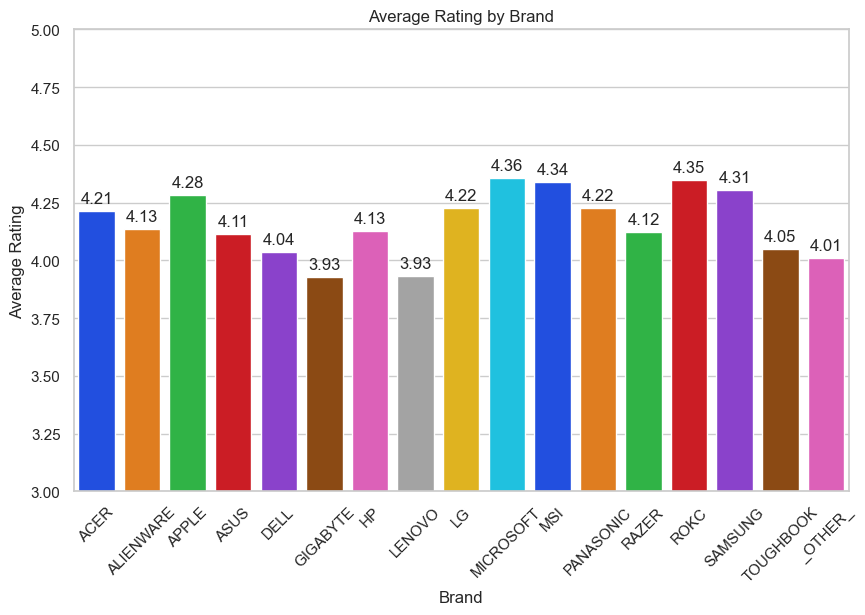

/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/1114992769.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph2 = sns.barplot(x='OS', y='RATING', data=average_rating_by_os,palette=palette)
/var/folders/h1/hv5lpnpj6nz9mhgjw35c7pvr0000gn/T/ipykernel_49521/1114992769.py:27: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  graph2 = sns.barplot(x='OS', y='RATING', data=average_rating_by_os,palette=palette)


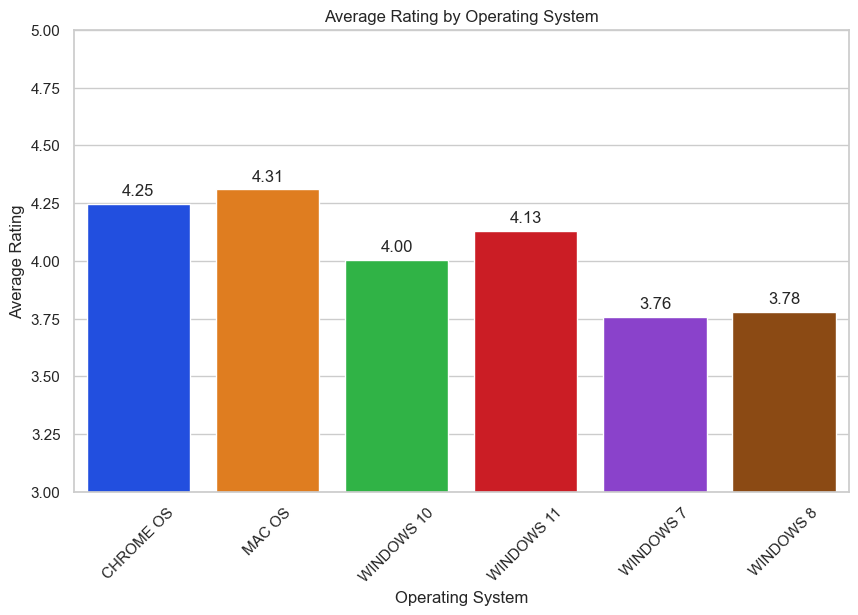

,BRAND,MODEL,SCREEN_SIZE(INCHES),COLOR,HARDDISK(GB),CPU,RAM(GB),OS,SPECIAL_FEATURES,GRAPHICS,GRAPHICS_COPROCESSOR,CPU_SPEED(GHz),RATING,PRICE($)
56,ACER,ASPIRE 3 A315,15.6,[SILVER],"(1024.0, 2048.0]",INTEL CORE I5,8.0,WINDOWS 11,"[HD AUDIO, NUMERIC KEYPAD, BACKLIT KEYBOARD, ...",INTEGRATED,NaN,2.29,NaN,1039.00
76,ACER,PT14-51-78B4,14.0,[SILVER],"(256.0, 512.0]",INTEL CORE I7,16.0,WINDOWS 11,"[FINGERPRINT READER, MEMORY CARD SLOT, BACKLIT...",DEDICATED,NaN,3.02,2.5,1049.99
91,LG,14Z90R-Q.APB3U1,14.0,[BLACK],NaN,INTEL CORE I5,8.0,WINDOWS 11,NaN,INTEGRATED,INTEL IRIS,2.29,NaN,1067.47
92,APPLE,MACBOOK AIR,13.3,NaN,"(128.0, 256.0]",NaN,8.0,MAC OS,NaN,INTEGRATED,NaN,NaN,4.0,1068.99
105,ACER,SP314-55N-76EX,14.0,[SILVER],"(256.0, 512.0]",INTEL CORE I7,16.0,WINDOWS 11,[SUPPORT STYLUS],INTEGRATED,NaN,3.02,3.5,1079.99


In [22]:
# Preparing for graphs
average_rating_by_brand = df.groupby('BRAND')['RATING'].mean().reset_index()
data_os_filtered = df[df['OS'].isin(['WINDOWS 11', 'WINDOWS 10', 'WINDOWS 9', 'WINDOWS 8', 'WINDOWS 7', 'MAC OS', 'CHROME OS'])]
average_rating_by_os = data_os_filtered.groupby('OS')['RATING'].mean().reset_index()
palette = sns.color_palette("bright")

# Graph 1
plt.figure(figsize=(10, 6))
graph1 = sns.barplot(x='BRAND', y='RATING', data=average_rating_by_brand,palette=palette)
plt.ylim(3, 5)
plt.xticks(rotation=45)
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')

# Annotating the actual average score
for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

# Graph 2
plt.figure(figsize=(10, 6))
graph2 = sns.barplot(x='OS', y='RATING', data=average_rating_by_os,palette=palette)
plt.ylim(3, 5)
plt.xticks(rotation=45)
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')

# Annotating the actual average score
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


# Filtering out brands with an average rating of 4.2 and under
brands_to_remove = average_rating_by_brand[average_rating_by_brand['RATING'] <= 4.2]['BRAND']
filtered_data_by_brand = df[~df['BRAND'].isin(brands_to_remove)]

# Filtering out OS with an average rating of 4.1 and under
os_to_remove = average_rating_by_os[average_rating_by_os['RATING'] <= 4.1]['OS']
CEO_client_df = filtered_data_by_brand[~filtered_data_by_brand['OS'].isin(os_to_remove)]

# Displaying the first few rows of the new filtered dataframe
CEO_client_df.head()


Step 3:
- Filter to meet essential requirements

In [23]:
# No laptops above the price of 1500
CEO_client_df = CEO_client_df[CEO_client_df['PRICE($)'] <= 1500]

# No laptops above screen size 15 inches
CEO_client_df = CEO_client_df[CEO_client_df['SCREEN_SIZE(INCHES)'] <= 15.0]

# No laptops with RAM of under 16
CEO_client_df = CEO_client_df[CEO_client_df['RAM(GB)'] >= 16]

# No laptops with no rating or rating below 4
CEO_client_df = CEO_client_df[CEO_client_df['RATING'] >= 4]

# Identify top 5 laptops based on rating
top_5 = CEO_client_df.nlargest(5, 'RATING')

print(top_5)

      BRAND                                              MODEL  \
306   APPLE  2022 APPLE MACBOOK AIR M2, 16GB RAM, 256GB STO...   
3754    MSI                               MODERN 14 C13M-621US   
4354   ACER           CHROMEBOOK ENTERPRISE SPIN 514 CP514-3WH   
518   APPLE  2022 APPLE MACBOOK AIR M2, 16GB RAM, 512GB STO...   
2855   ACER                                       AV14-51-58XZ   

      SCREEN_SIZE(INCHES)     COLOR HARDDISK(GB)            CPU  RAM(GB)  \
306                  13.6       NaN   (128, 256]       APPLE M1     16.0   
3754                 14.0  [SILVER]  (512, 1024]  INTEL CORE I7     16.0   
4354                 14.0       NaN   (128, 256]    AMD RYZEN 7     16.0   
518                  13.6       NaN   (256, 512]       APPLE M1     16.0   
2855                 14.0       NaN   (256, 512]  INTEL CORE I5     16.0   

              OS         SPECIAL_FEATURES    GRAPHICS GRAPHICS_COPROCESSOR  \
306       MAC OS                      NaN  INTEGRATED               

Review Step:
- Create graphs to verify that the laptop recommendations are valid

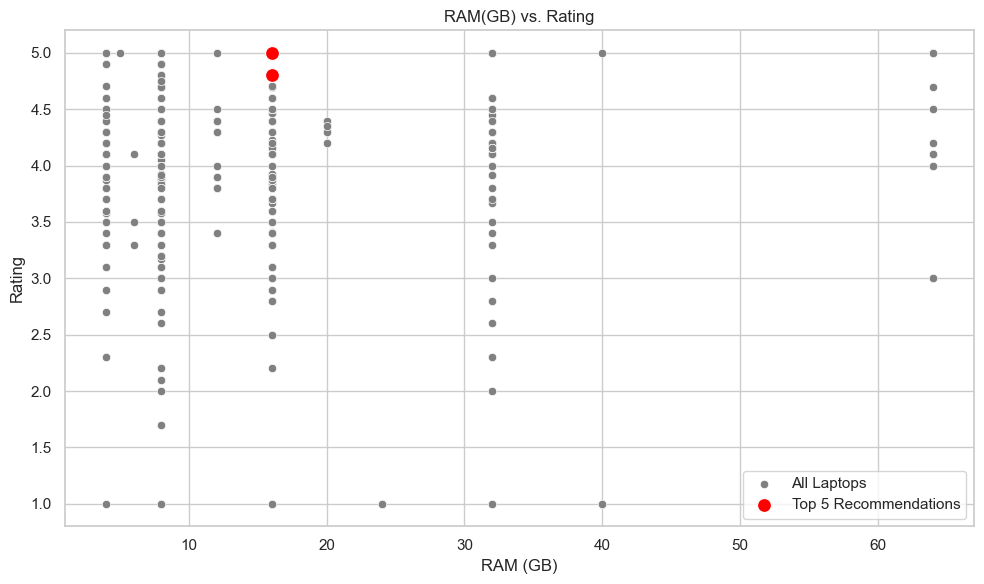

In [24]:
# Filtering the dataset for laptops under $1500
review_df = df[df['PRICE($)'] <= 1500]

# Graph 1 plotting RAM vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM(GB)', y='RATING', data=review_df, color='gray', label='All Laptops')
sns.scatterplot(x='RAM(GB)', y='RATING', data=top_5, color='red', label='Top 5 Recommendations', s=100)
plt.title('RAM(GB) vs. Rating')
plt.xlabel('RAM (GB)')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()